<a href="https://colab.research.google.com/github/jeongin-Lee/INBIG-ML/blob/main/3_2_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3-2 선형 회귀  (농어의 무게를 예측할 수 있을까?)

---


## key word : <선형회귀,계수 또는 가중치, 모델 파라미터, 다항회귀>

1.  k-최근접 이웃 회귀와 선형 회귀 알고리즘의 차이를 이해하고 사이킷런을 사용해 여러가지 선형회귀 모델을 만들어 봅니다. 

*    K-최근접 이웃 회귀
        *   회귀 : 두 변수 사이의 상관관계를 분석하는 방법항목 추가
        *   K-최근접 이웃 회귀 : 예측하려는 샘플 k개를 선택하여 이웃 샘플의 수치를 사용해 평균을 구하여 예측.항목 추가

*    선형회귀
        *   회귀 : 두 변수 사이의 상관관계를 분석하는 방법항목 추가
        *   K-최근접 이웃 회귀 : 예측하려는 샘플 k개를 선택하여 이웃 샘플의 수치를 사용해 평균을 구하여 예측.항목 추가





## 1) k-최근접 이웃의 한계




In [1]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [6]:
from sklearn.model_selection import train_test_split

# 데이터를 훈련세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 훈련세트와 테스트 세트를 이차원 배열로 바꾸기
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

train_input

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ],
       [25. ],
       [40. ],
       [39. ],
       [43. ],
       [22. ],
       [20. ],
       [22. ],
       [24. ],
       [27.5],
       [43. ],
       [40. ],
       [24. ],
       [21. ],
       [27.5],
       [40. ],
       [32.8],
       [26.5],
       [36.5],
       [13.7],
       [22.7],
       [15. ],
       [37. ],
       [35. ],
       [28.7],
       [23.5],
       [39. ],
       [21. ],
       [23. ],
       [22. ],
       [44. ],
       [22.5],
       [19. ],
       [37. ],
       [22. ],
       [25.6],
       [42. ],
       [34.5]])

In [10]:
from sklearn.neighbors import KNeighborsRegressor
# 최근접 이웃 개수를 3으로 하는 모델을 훈련
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input,train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [12]:
print(knr.predict([[50]]))
# 예측값은 1033.33이지만 실제 농어의 무게는 훨씬 더 많이 나감.

[1033.33333333]


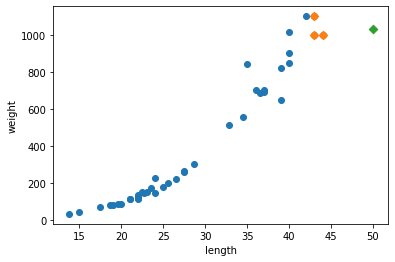

In [17]:
import matplotlib.pyplot as plt
# 50cm 농어의 최근접 이웃을 구함.
distances, indexes = knr.kneighbors([[50]])
# 훈련세트의 산점도 그리기
plt.scatter(train_input,train_target)
# 훈련세트 중에서 이웃 샘플만 다시 그리기
plt.scatter(train_input[indexes],train_target[indexes],marker='D')
# 50CM 농어 데이터
plt.scatter(50,1033,marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [18]:
print(np.mean(train_target[indexes]))
# k-최근접 이웃 알고리즘은 가장 가까운 근방의 3개 모델의 평균 값을 예측값으로 주기 때문에
# 훈련세트를 벗어나면 엉뚱한 값으로 예측될 수 있음. 

1033.3333333333333


In [20]:
print(knr.predict([[100]])) # 이차원 배열 

[1033.33333333]


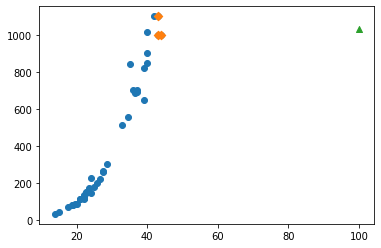

In [22]:
# 100cm 농어의 이웃을 구함
distances, indexes = knr.kneighbors([[100]])
# 산점도
plt.scatter(train_input,train_target)
# 이웃 샘플 
plt.scatter(train_input[indexes],train_target[indexes],marker='D')
# 길이 100 농어 표시
plt.scatter(100,1033,marker='^')
plt.show()

# k-최근접 이웃을 사용해 해결하려면 가장 큰 농어가 포함되도록 훈련세트를 계속해서 다시 만들어야 함.
# 문제점 해결을 위해 ---->>>>> 선형회귀 알고리즘 사용 !!!!

## 2) 선형회귀

* 선형회귀 :특성과 타깃 사이의 관계를 잘 나타내는 선형 방정식 찾기 ! 
* 이때 특성이 하나인 경우 직선 방정식이 됨.



In [52]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델을 훈련
lr.fit(train_input,train_target)
# 길이 50인 농어를 예측
print(lr.predict([[50]])) 

[1241.83860323]


In [53]:
print(lr.coef_, lr.intercept_)
# lr.coef 와 lr.intercept를 모델 파라미터라고 부르며 
# 이 책에서 사용하는 많은 머신러닝 알고리즘 훈련과정은
# 최적 모델 파라미터를 찾는 것과 같음.  -> 모델 기반 학습 
# 반면 k-최근접 이웃에는 모델 파라미터가 없으며 훈련세트를
# 저장하는 것이 훈련의 전부이기 때문에 사례 기반 학습이라고 부름.

[39.01714496] -709.0186449535477


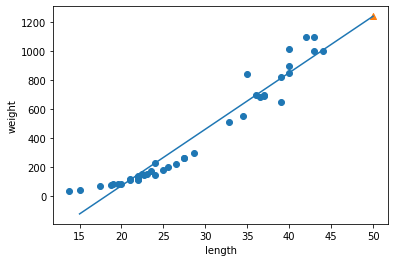

In [54]:
# 훈련세트의 산점도 그리기
plt.scatter(train_input,train_target)

plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])
plt.scatter(50,1241.8,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [55]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

# 훈련세트와 테스트 세트의 점수가 조금 차이남
# 훈련세트가 테스트 세트보다 점수가 높지만 두 세트의 점수가 모두 높은 편이 아니기 때문에
# 전체적으로 과소적합 되었다고 할 수 있음.
# + 그래프 아래같은 경우는 회귀직선에서 매우 벗어난 형태를 보임.

0.9398463339976039
0.8247503123313558


### ▶ 과대적합 & 과소적합
>*   과대적합: 훈련세트 성능이 테스트 세트 성능보다 훨씬 높은 경우  
모델이 훈련세트에 집착하여 데이터에 내재된 거시적인 패턴을 감지하지 못함.  
*    과소적합: 훈련 세트와 테스트 세트 성능이 모두 동일하게 낮거나 테스트 세트 성능이 오히려 더 높은 경우  
더 복잡한 모델을 사용해 훈련세트에 잘 맞는 모델을 만들어야 함.


## 3) 다항회귀 (다항식을 사용한 선형회귀)

* 다항 회귀 : 다항식을 사용하여 특성과 타깃의 관계를 나타내며 함수는 비선형일 수 있지만 여전히 선형회귀로 표현할 수 있음.

* 농어의 산점도가 직선보다는 2차곡선에 가까우므로 2차식의 그래프를 그리기 위해 길이를 제곱한 항을 훈련세트에 추가하자 ! 











In [60]:
knr.n_neighbors = 3 # 기본값이 5였던 참고 이웃의 개수를 3으로 변경

train_poly=np.column_stack((train_input**2,train_input))
test_poly = np.column_stack((test_input**2,test_input))
print(train_poly.shape,test_poly.shape) # train test 모두 열이 두개로 늘어남.


(42, 2) (14, 2)


In [61]:
lr=LinearRegression()
lr.fit(train_poly,train_target)
print(lr.predict([[50**2,50]]))
print(lr.coef_,lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.05021078278276


Text(0, 0.5, 'weight')

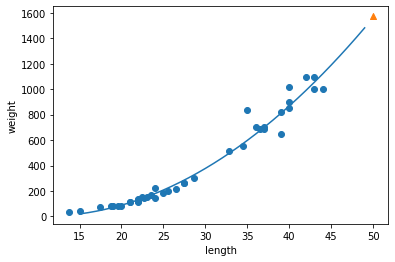

In [62]:
# 다항식을 사용한 선형회귀 - 구간별 점찍고 직선을 이어서 곡선으로 만들기 
point = np.arange(15,50)
plt.scatter(train_input,train_target)
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
plt.scatter(50,1574,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
# 앞선 단순 선형회귀보다 훨씬 fit 된 그래프 완성 ! ! 

In [63]:
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

# (훈련셋트점수<테스트세트 점수)로 인해 과소적합이 남아있음을 알 수 있음.
# 조금 더 복잡한 모형 필요 ! ! 

0.9706807451768623
0.9775935108325122


### ▶ &#10024;선형회귀로 훈련 세트 범위 밖의 샘플 예측하기 문제 해결 ! ! &#10024;